<a href="https://colab.research.google.com/github/Rushp0/Electromyography-and-Gradient-Boosting/blob/main/Electromyography_and_Gradient_Boosting_Cosinusoidal_Dataset_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import pandas as pd
import jax
import jax.numpy as jnp

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt

# Generate Data
Creates noisy clipped cosine function 

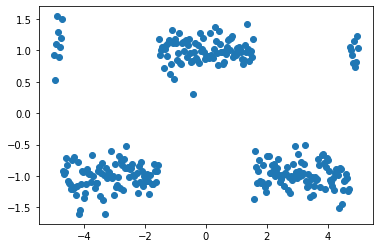

In [ ]:
X = jnp.linspace(-5, 5, 300)
mu = 0.2

y = jnp.sign(jnp.cos(X)) + mu * jax.random.normal(jax.random.PRNGKey(0), (X.size,))
data = pd.DataFrame(zip(X,y), columns=['X', 'y'])

plt.scatter(X,y)
X = jnp.reshape(X, (-1,1))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2
X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
print(clf.score(X_test, y_test))




0.913


# Initalize Crappy Model

In [ ]:
tree_1 = DecisionTreeRegressor(max_depth=2)
tree_1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

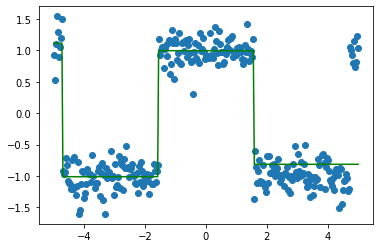

In [ ]:
# store tree 1 predictions into dataframe
data["tree_1_pred"] = tree_1.predict(X)

# plot tree 1 predictions vs ground truth
tree1, = plt.plot(data["X"], data["tree_1_pred"], label="Tree 1 Prediction", color='g')
plt.scatter(X,y)


# Calculate residuals

In [ ]:
data["tree_1_residuals"] = data["y"] - data["tree_1_pred"]
data

,X,y,tree_1_pred,tree_1_residuals
0,-5.0,0.93459404,1.116698,-0.18210435
1,-4.966555,0.521033,1.116698,-0.5956654
2,-4.93311,1.1054668,1.116698,-0.011231542
3,-4.899666,1.5460362,1.116698,0.42933786
4,-4.866221,1.2982934,1.116698,0.18159497
...,...,...,...,...
295,4.8662205,1.1539304,-0.815805,1.9697351
296,4.8996654,0.7410033,-0.815805,1.556808
297,4.93311,0.820122,-0.815805,1.6359267
298,4.966555,1.2340584,-0.815805,2.049863


# Train second tree on tree 1 residuals

In [ ]:
tree_2 = DecisionTreeRegressor(max_depth=2)
tree_2.fit(X, data["tree_1_residuals"])

DecisionTreeRegressor(max_depth=2)

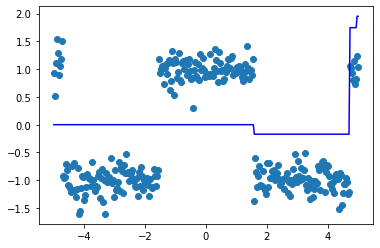

In [ ]:
# store tree 2 predictions into dataframe
data["tree_2_pred"] = tree_2.predict(X)

# plot tree 1 predictions vs ground truth
tree2, = plt.plot(data["X"], data["tree_2_pred"], label="Tree 2 Prediction", color='b')
plt.scatter(X,y)



# Create composite Model

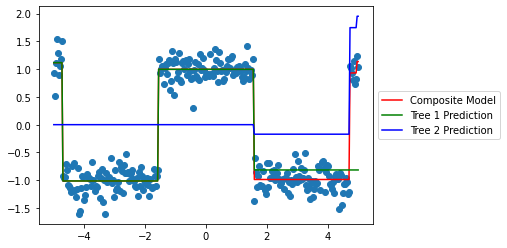

In [ ]:
data["composite_model"] = data["tree_1_pred"] + data["tree_2_pred"]

# plot composite model predictions vs ground truth
comp, = plt.plot(data["X"], data["composite_model"], label="Composite Model", color='r')
tree1, = plt.plot(data["X"], data["tree_1_pred"], label="Tree 1 Prediction", color='g')
tree2, = plt.plot(data["X"], data["tree_2_pred"], label="Tree 2 Prediction", color='b')
plt.scatter(X,y)
plt.legend([comp, tree1, tree2], ["Composite Model", "Tree 1 Prediction", "Tree 2 Prediction"], loc='center left', bbox_to_anchor=(1, 0.5))

